# Spectral Graph K-partitioning

---

Instead of using recursive spectral bipartitioning, the graph $k$-partitioning problem can be solved using $k$ eigenvaectors which correspond to $k$ smallest eigenvalues of Laplaciain matrix or normalized Laplacian matrix, respectively.

Suggested reading is [U. von Luxburg, A Tutorial on Spectral Clustering][Lux07], which includes the quote _"spectral clustering cannot serve as a “black box algorithm” which automatically detects the correct clusters in any
given data set. But it can be considered as a powerful tool which can produce good results if applied with care."_

[Lux07]: http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/luxburg06_TR_v2_4139%5b1%5d.pdf "U. von Luxburg, 'A Tutorial on Spectral Clustering', Max Planck Institute for Biological Cybernetics, Tübingen, 2007."

## Prerequisites

The reader should be familiar with k-means algorithm, spectral graph bipartitioning and 
recursive bipartitioning.
 
## Competences 

The reader should be able to apply graph spectral k-partitioning to data clustering problems.

__Credits__: The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

---

## The relaxed problem

Let $G=(V,E)$ be a weighted graph with weights $\omega$, with weights matrix $W$, Laplacian matrix $L=D-W$, and normalized Laplacian matrix $L_n=D^{-1/2}(D-W)D^{-1/2}$. 

Let the $k$-partition $\pi_k =\{V_{1},V_{2},...,V_{k}\}$, the cut $cut(\pi_k)$, 
the proportional cut $pcut(\pi_k)$ and 
the normalized cut $ncut(\pi_k)$ be defined as in the
[Spectral Graph Bipartitioning](L10 Spectral Graph Bipartitioning.ipynb) notebook.

### Definition

__Partition vectors__ of a $k$-partition $\pi_k$ are
\begin{align*}
h_{1} &=[\overset{\displaystyle |V_{1}|}{\overbrace{1,\cdots
,1}},0,\cdots
,0,\cdots ,0,\cdots ,0]^{T}  \\
h_{2} &=[0,\cdots
,0,\overset{\displaystyle |V_{2}|}{\overbrace{1,\cdots ,1}} ,\cdots ,0,\cdots
,0]^{T} \\
&\vdots \\
h_{k} &=[0,\cdots ,0,0,\cdots ,0,\cdots
,\overset{\displaystyle |V_{k}|}{ \overbrace{1,\cdots ,1}}]^{T}.
\end{align*}

### Facts

1. Set
\begin{align*}
X&=\begin{bmatrix} x_1 & x_2 &\cdots & x_k \end{bmatrix}, \quad 
x_i=\displaystyle \frac{h_i}{\|h_i\|_2}, \\
Y&=\begin{bmatrix} y_1 & y_2 &\cdots & y_k \end{bmatrix}, \quad
y_i=\displaystyle \frac{D^{1/2}h_i}{\|D^{1/2}h_i\|_2}.
\end{align*}
It holds
\begin{align*}
& cut(V_{i},V\backslash V_{i})=h_{i}^{T}(D-W)h_{i}=h_{i}^{T}L h_{i},\quad 
\omega( C_{i})=h_{i}^{T}D h_{i},\quad |C_{i}| =h_{i}^{T}h_{i},\\
& pcut(\pi_k) =\frac{h_{1}^{T}L h_{1}}{h_{1}^{T} h_{1}}+
\cdots + \frac{h_{k}^{T}L h_{k}}{h_{k}^{T}h_{k}}
=x_{1}^{T}L x_{1}+\cdots +x_{k}^{T}Lx_{k}=\mathop{\mathrm{trace}}(X^{T}LX),\\
& ncut(\pi_k)=\frac{h_{1}^{T}L h_{1}}{h_{1}^{T}D h_{1}}+\cdots
+\frac{h_{k}^{T}L h_{k}}{h_{k}^{T}D h_{k}}
=\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

2. The __relaxed__ $k$-partitioning problems are trace-minimization problems,
\begin{align*}
\min_{\displaystyle \pi_k} pcut(\pi_k) &\geq
\underset{\displaystyle X\in\mathbb{R}^{n\times k}}{\min_{\displaystyle X^{T}X=I}}
\mathop{\mathrm{trace}}(X^{T}LX),\\
\min_{\displaystyle \pi_k} ncut(\pi_k) &\geq
\underset{\displaystyle Y\in\mathbb{R}^{n\times
k}}{\min_{\displaystyle Y^{T}Y=I}}\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

3. __Ky-Fan  Theorem__: Let $A\in \mathbb{R}^{n\times n}$ be a symmetric matrix with
eigenvalues $\lambda _1\leq \cdots \leq \lambda_n$. Then
$$
\underset{\displaystyle Z^TZ=I}{\min_{\displaystyle Z\in \mathbb{R}^{n\times
k}}}\mathop{\mathrm{trace}}\left(Z^{T}AZ\right)
=\sum_{i=1}^{k}\lambda_{i}.
$$

4. Let $\lambda_1\leq \cdots \leq \lambda_n$ be the eigenvalues of $L$ with eigenvectors 
$v^{[1]},\cdots ,v^{[k]}$. The solution of the relaxed proportional cut problem is the matrix $X=\begin{bmatrix}v^{[1]} & \cdots & v^{[k]}\end{bmatrix}$, and it holds
$\min_\limits{\displaystyle \pi_k} pcut(\pi_k)\geq \sum_\limits{i=1}^k \lambda_i$.

5. Let $\mu_1\leq \cdots \leq \mu_n$ be the eigenvalues of $L_n$ with eigenvectors 
$w^{[1]},\cdots ,w^{[k]}$. The solution of the relaxed noprmalized cut problem is the matrix $Y=\begin{bmatrix}w^{[1]} & \cdots & w^{[k]}\end{bmatrix}$, and it holds
$\min_\limits{\displaystyle \pi_k} ncut(\pi_k)\geq \sum_\limits{i=1}^k \mu_i$.

6. It remains to recover the $k$-partition. The k-means algorithm applied to rows of the matrices $X$ or $D^{-1/2}Y$, will compute the $k$ centers and the assignment vector whose $i$-th component denotes the subset $V_j$ to which the vertex $i$ belongs.

### Example - Graph with three clusters

In [1]:
using Graphs
using IJuliaPortrayals
using Clustering

In [2]:
# Sources, targets, and weight
sn=[1,1,1,2,2,3,2,3,5,6,7,7,8]
tn=[2,3,4,3,4,4,7,5,6,9,9,8,9]
wn=[2,3,4,4,5,6,1,1,7,1,3,4,2]
[sn tn wn]

13x3 Array{Int64,2}:
 1  2  2
 1  3  3
 1  4  4
 2  3  4
 2  4  5
 3  4  6
 2  7  1
 3  5  1
 5  6  7
 6  9  1
 7  9  3
 7  8  4
 8  9  2

In [3]:
n=9
m=length(sn)
G = inclist(ExVertex, ExEdge{ExVertex}; is_directed=false)
for i=1:9
    add_vertex!(G, ExVertex(i,"$i"))
end
for i=1:m
    add_edge!(G, vertices(G)[sn[i]], vertices(G)[tn[i]])
end
for i=1:length(G.inclist)
    for j=1:length(G.inclist[i])
        ei=G.inclist[i][j]
        attrs = attributes(ei, G)
        attrs["label"] = wn[edge_index(ei,G)]
    end
end

In [4]:
# What is the optimal tripartition?
GraphViz(to_dot(G),"neato","svg")

IJuliaPortrayals.GraphViz("graph graphname {\n1 -- 2 [\"label\"=\"2\"]\n1 -- 3 [\"label\"=\"3\"]\n1 -- 4 [\"label\"=\"4\"]\n2 -- 3 [\"label\"=\"4\"]\n2 -- 4 [\"label\"=\"5\"]\n2 -- 7 [\"label\"=\"1\"]\n3 -- 4 [\"label\"=\"6\"]\n3 -- 5 [\"label\"=\"1\"]\n5 -- 6 [\"label\"=\"7\"]\n6 -- 9 [\"label\"=\"1\"]\n7 -- 9 [\"label\"=\"3\"]\n7 -- 8 [\"label\"=\"4\"]\n8 -- 9 [\"label\"=\"2\"]\n}\n","neato","svg")

In [5]:
L=laplacian_matrix(G,wn)

9x9 Array{Int64,2}:
  9  -2  -3  -4   0   0   0   0   0
 -2  12  -4  -5   0   0  -1   0   0
 -3  -4  14  -6  -1   0   0   0   0
 -4  -5  -6  15   0   0   0   0   0
  0   0  -1   0   8  -7   0   0   0
  0   0   0   0  -7   8   0   0  -1
  0  -1   0   0   0   0   8  -4  -3
  0   0   0   0   0   0  -4   6  -2
  0   0   0   0   0  -1  -3  -2   6

In [6]:
# Normalized Laplacian matrix
function normalized(L::Matrix)
    D=1.0./sqrt(diag(L))
    n=length(D)
    Ln=map(Float64,Symmetric([L[i,j]*D[i]*D[j] for i=1:n,j=1:n]))
    # Set diagonal exactly to 1
    for i=1:n
        Ln[i,i]=1.0
    end
    Ln  
end

normalized (generic function with 1 method)

In [7]:
Ln=normalized(L)

9x9 Array{Float64,2}:
  1.0       -0.19245   -0.267261   …   0.0        0.0        0.0     
 -0.19245    1.0       -0.308607      -0.102062   0.0        0.0     
 -0.267261  -0.308607   1.0            0.0        0.0        0.0     
 -0.344265  -0.372678  -0.414039       0.0        0.0        0.0     
  0.0        0.0       -0.0944911      0.0        0.0        0.0     
  0.0        0.0        0.0        …   0.0        0.0       -0.144338
  0.0       -0.102062   0.0            1.0       -0.57735   -0.433013
  0.0        0.0        0.0           -0.57735    1.0       -0.333333
  0.0        0.0        0.0           -0.433013  -0.333333   1.0     

In [8]:
# Proportional cut, the clustering is visible in the components of v_2 and v_3
λ,Y=eigs(L,nev=3,which=:SM, v0=ones(n))

([4.934324553889581e-16,0.7885231802373419,1.2104922881233322],
9x3 Array{Float64,2}:
 -0.333333   0.383624   -0.121476 
 -0.333333   0.323492   -0.129956 
 -0.333333   0.344649   -0.0752859
 -0.333333   0.367298   -0.115116 
 -0.333333  -0.0953074   0.612081 
 -0.333333  -0.147422    0.60443  
 -0.333333  -0.355516   -0.282486 
 -0.333333  -0.424836   -0.311411 
 -0.333333  -0.395981   -0.18078  ,

3,1,9,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [9]:
out=kmeans(Y',3)

Clustering.KmeansResult{Float64}(3x3 Array{Float64,2}:
 -0.333333  -0.333333  -0.333333
 -0.121365   0.354766  -0.392111
  0.608256  -0.110459  -0.258226,[2,2,2,2,1,1,3,3,3],[0.0009541957420937663,0.001358227596906847,0.0013394656501290458,0.0001787564498633154,0.0006936219019545442,0.0006936219019545442,0.0019277494627215619,0.003899607802030247,0.0060127518263858315],[2,4,3],[2.0,4.0,3.0],0.017057998334039703,2,true)

In [10]:
# Normalized cut
# Lanczos cannot be used for "smallest in magnitude" evals of singular matrix
# The above case is exception, rather than rule.
# λ,Y=eigs(Ln,nev=3,which=:SM) 
μ,Y=eig(Ln)
Y=Y[:,1:3]
D=sqrt(diag(L))
Y=diagm(1.0./D)*Y
out=kmeans(Y',3)

Clustering.KmeansResult{Float64}(3x3 Array{Float64,2}:
 -0.107833  -0.107833  -0.107833 
 -0.144522  -0.104042   0.0909339
  0.131546  -0.19892    0.011189 ,[3,3,3,3,2,2,1,1,1],[6.017933267282727e-5,0.00019669450163053298,0.00016014209379326683,3.376565874205206e-5,8.234250494340567e-5,8.234250494340567e-5,0.00019114009597787085,0.0004431740534307088,0.0007796669031784192],[3,2,4],[3.0,2.0,4.0],0.0020294476493124894,2,true)

### Example - Concentric rings

In [12]:
using Winston
using Colors
using Distances

In [13]:
function plotKpartresult(C::Vector,X::Array)
    p=FramedPlot()
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(C.==j)],
        X[2,find(C.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    p
end

plotKpartresult (generic function with 1 method)

In [14]:
# Generate concentric rings
k=4
# Center
center=[rand(-5:5);rand(-5:5)]
# Radii
radii=randperm(k)[1:k]
# Number of points in circles
sizes=rand(500:1000,k)
center,radii,sizes

([1,1],[4,3,2,1],[847,678,791,744])

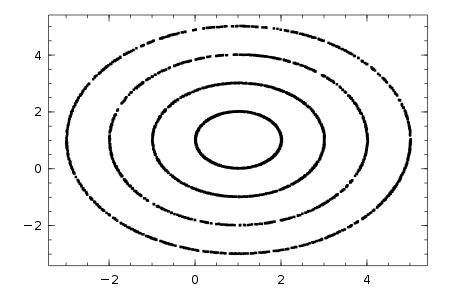

In [15]:
# Points
m=sum(sizes)
X=Array(Float64,2,m)
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2)-0.5)/50
    end
end
Winston.plot(X[1,:],X[2,:],".")

In [16]:
S=pairwise(SqEuclidean(),X)
# S=pairwise(Cityblock(),X)
β=10

10

In [17]:
W=exp(-β*S)
D=vec(sum(W,2))
L=diagm(D)-W
Ln=normalized(L)

3060x3060 Array{Float64,2}:
  1.0           -0.00519953    -1.14306e-23   …  -6.40665e-81   -1.69996e-47 
 -0.00519953     1.0           -3.68471e-34      -2.27893e-85   -2.69548e-50 
 -1.14306e-23   -3.68471e-34    1.0              -1.10276e-61   -2.11354e-41 
 -3.12925e-32   -5.63585e-22   -1.54161e-95      -3.474e-101    -6.41041e-66 
 -2.19805e-202  -4.57616e-186  -4.29838e-259     -3.65495e-104  -5.15001e-106
 -5.99619e-166  -2.64974e-148  -4.86899e-235  …  -1.06431e-108  -2.0719e-100 
 -1.93488e-178  -2.11091e-195  -7.04994e-101     -1.76105e-41   -8.39883e-65 
 -4.59367e-13   -4.52866e-21   -0.000763673      -3.3268e-67    -3.34031e-42 
 -7.98315e-194  -6.06457e-177  -1.35454e-254     -2.55369e-106  -1.94115e-105
 -3.69384e-135  -1.86664e-117  -3.06252e-210     -2.8855e-110   -2.45741e-94 
 -0.0218514     -8.97496e-5    -1.20146e-18   …  -8.0832e-79    -1.75295e-46 
 -1.38527e-10   -2.10928e-5    -8.55913e-57      -1.57433e-92   -4.36291e-56 
 -1.8962e-130   -9.30973e-113  -1.91

λ = [1.0280742578527364e-16,2.3016348196618898e-5,9.21122754668634e-5,0.00016589006411498106]


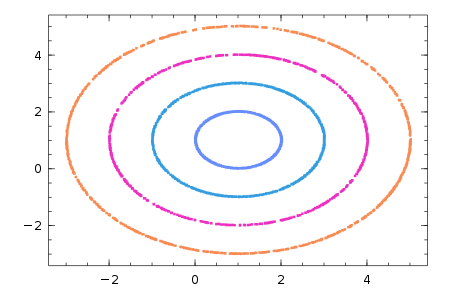

In [18]:
# Normalized Laplacian
λ,Y=eigs(Ln,nev=k,which=:SM, v0=ones(m))
@show λ
Y=diagm(1.0./sqrt(D))*Y
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)

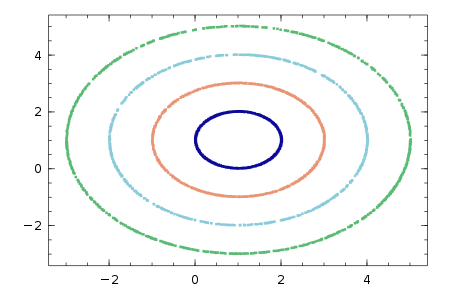

In [19]:
# Laplacian
λ,Y=eigs(L,nev=k,which=:SM, v0=ones(m))
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)